# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time

# Import API key
from config import api_key
#api_key = "8a0815ae41954532d12b06638eef7973"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
#print(lat_lngs)
print(len(lats))


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

1500


636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Initialize DataFrame to store data
Weather_df=pd.DataFrame(columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])
#print(Weather_df)
count=1
set_num=1
error_num=0
index=0

print("Beginning Data Retrieval\n-----------------------------")

#looping through each city 
for city in cities:
    #Exception Handling using try & except 
    try:
        #Create url for API call
        base_url = "http://api.openweathermap.org/data/2.5/weather?"
        query_url = f"{base_url}appid={api_key}&units=imperial&q="
       
        #API call for corresponding city
        city_weather= requests.get(query_url + city).json()
        
        #print log for each city
        print(f"Processing Record {count} of Set {set_num}  | {city}")
        
        #Fill the DataFrame with the weather data for the city
        Weather_df.set_value(index, "City", city_weather["name"])
        Weather_df.set_value(index, "Cloudiness", city_weather["clouds"]["all"])
        Weather_df.set_value(index, "Country", city_weather["sys"]["country"])
        Weather_df.set_value(index, "Date", city_weather["dt"])
        Weather_df.set_value(index, "Max Temp", city_weather["main"]["temp_max"])
        Weather_df.set_value(index, "Wind Speed", city_weather["wind"]["speed"])
        Weather_df.set_value(index, "Lat", city_weather["coord"]["lat"])
        Weather_df.set_value(index, "Lng", city_weather["coord"]["lon"])
        Weather_df.set_value(index, "Humidity", city_weather["main"]["humidity"])
        
        #Increment the index
        index+=1
        
    except KeyError:
        print("City not found. Skipping...")
        error_num+=1
        
    count+=1
    if count==50:
        count=0
        set_num+=1
    
print("-----------------------------\nData Retrieval Complete\n-----------------------------")
print(f"There are no data for {error_num} cities")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1  | rikitea


C:\Users\Sakar Pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sakar Pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sakar Pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sakar Pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sakar Pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors ins

Processing Record 2 of Set 1  | mataura
Processing Record 3 of Set 1  | mrirt
City not found. Skipping...
Processing Record 4 of Set 1  | mahon
Processing Record 5 of Set 1  | ushuaia
Processing Record 6 of Set 1  | lagoa
Processing Record 7 of Set 1  | nikolskoye
Processing Record 8 of Set 1  | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1  | san patricio
Processing Record 10 of Set 1  | goderich
Processing Record 11 of Set 1  | upernavik
Processing Record 12 of Set 1  | tarakan
Processing Record 13 of Set 1  | tuktoyaktuk
Processing Record 14 of Set 1  | havre-saint-pierre
Processing Record 15 of Set 1  | cabo san lucas
Processing Record 16 of Set 1  | hithadhoo
Processing Record 17 of Set 1  | ketchikan
Processing Record 18 of Set 1  | namibe
Processing Record 19 of Set 1  | yulara
Processing Record 20 of Set 1  | pinawa
Processing Record 21 of Set 1  | bluff
Processing Record 22 of Set 1  | skofljica
Processing Record 23 of Set 1  | vardo
Processing Record 

Processing Record 36 of Set 4  | chupa
Processing Record 37 of Set 4  | ribeira grande
Processing Record 38 of Set 4  | albion
Processing Record 39 of Set 4  | half moon bay
Processing Record 40 of Set 4  | atar
Processing Record 41 of Set 4  | naryan-mar
Processing Record 42 of Set 4  | ponta do sol
Processing Record 43 of Set 4  | kumluca
Processing Record 44 of Set 4  | geraldton
Processing Record 45 of Set 4  | cuamba
Processing Record 46 of Set 4  | anito
Processing Record 47 of Set 4  | octeville
Processing Record 48 of Set 4  | concepcion
Processing Record 49 of Set 4  | deep river
Processing Record 0 of Set 5  | hambantota
Processing Record 1 of Set 5  | grand-santi
Processing Record 2 of Set 5  | mangaluru
Processing Record 3 of Set 5  | dudinka
Processing Record 4 of Set 5  | richards bay
Processing Record 5 of Set 5  | kavieng
Processing Record 6 of Set 5  | palabuhanratu
City not found. Skipping...
Processing Record 7 of Set 5  | serebryansk
Processing Record 8 of Set 5  | 

Processing Record 16 of Set 8  | alanya
Processing Record 17 of Set 8  | burnie
Processing Record 18 of Set 8  | do gonbadan
Processing Record 19 of Set 8  | saint george
Processing Record 20 of Set 8  | adrian
Processing Record 21 of Set 8  | bathsheba
Processing Record 22 of Set 8  | minggang
Processing Record 23 of Set 8  | hami
Processing Record 24 of Set 8  | poum
Processing Record 25 of Set 8  | meyungs
City not found. Skipping...
Processing Record 26 of Set 8  | shelburne
Processing Record 27 of Set 8  | dunedin
Processing Record 28 of Set 8  | yerbogachen
Processing Record 29 of Set 8  | mudanjiang
Processing Record 30 of Set 8  | salalah
Processing Record 31 of Set 8  | sanmenxia
Processing Record 32 of Set 8  | santiago del estero
Processing Record 33 of Set 8  | gimli
Processing Record 34 of Set 8  | quatre cocos
Processing Record 35 of Set 8  | rio grande
Processing Record 36 of Set 8  | schleswig
Processing Record 37 of Set 8  | boldumsaz
Processing Record 38 of Set 8  | m

Processing Record 46 of Set 11  | portland
Processing Record 47 of Set 11  | kisanga
Processing Record 48 of Set 11  | kuryk
Processing Record 49 of Set 11  | oksfjord
Processing Record 0 of Set 12  | bom jesus
Processing Record 1 of Set 12  | urumqi
City not found. Skipping...
Processing Record 2 of Set 12  | rawson
Processing Record 3 of Set 12  | naze
Processing Record 4 of Set 12  | kota kinabalu
Processing Record 5 of Set 12  | umzimvubu
City not found. Skipping...
Processing Record 6 of Set 12  | cabedelo
Processing Record 7 of Set 12  | saryshagan
City not found. Skipping...
Processing Record 8 of Set 12  | samusu
City not found. Skipping...
Processing Record 9 of Set 12  | grindavik
Processing Record 10 of Set 12  | kovdor
Processing Record 11 of Set 12  | stockbridge
Processing Record 12 of Set 12  | otane
Processing Record 13 of Set 12  | pahrump
Processing Record 14 of Set 12  | lompoc
Processing Record 15 of Set 12  | porto empedocle
Processing Record 16 of Set 12  | ouango

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Export data into csv file
Weather_df.to_csv('City_Weather.csv')
print(Weather_df.count())

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64


In [6]:
Weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,12,PF,1549352893,100,-23.12,-134.97,80.89,7.87
1,Mataura,0,NZ,1549352893,63,-46.19,168.86,50.6,19.06
2,Mahon,75,IE,1549351800,100,51.89,-8.4,50,12.75
3,Ushuaia,0,AR,1549350000,82,-54.81,-68.31,55.4,11.41
4,Lagoa,0,PT,1549351800,80,37.14,-8.45,39.2,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

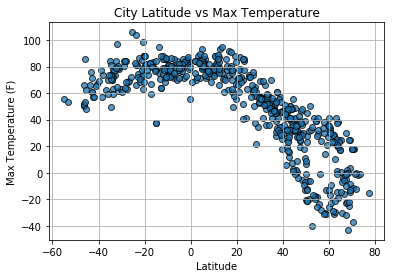

In [14]:
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel(f"Max Temperature (F)")
plt.scatter(Weather_df["Lat"], Weather_df["Max Temp"], marker="o", edgecolor="black", alpha=0.75)
plt.grid()
plt.savefig("Lat vs Temp.png")
plt.show()


#### Latitude vs. Humidity Plot

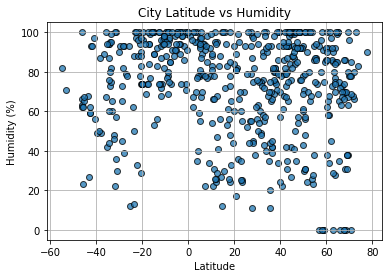

In [13]:
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel(f"Humidity (%)")
plt.scatter(Weather_df["Lat"], Weather_df["Humidity"], marker="o", edgecolor="black", alpha=0.75)
plt.grid()
plt.savefig("Lat vs Humidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

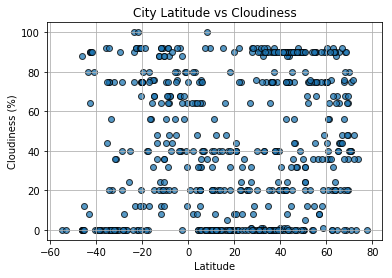

In [12]:
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel(f"Cloudiness (%)")
plt.scatter(Weather_df["Lat"], Weather_df["Cloudiness"], marker="o", edgecolor="black", alpha=0.75)
plt.grid()
plt.savefig("Lat vs Cloudiness.png")
plt.show()


#### Latitude vs. Wind Speed Plot

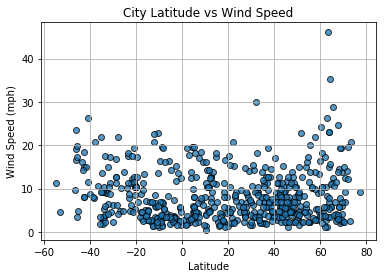

In [11]:
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel(f"Wind Speed (mph)")
plt.scatter(Weather_df["Lat"], Weather_df["Wind Speed"], marker="o", edgecolor="black", alpha=0.75)
plt.grid()
plt.savefig("Lat vs Wind Speed.png")
plt.show()
